In [ ]:
with open('dataset.txt',encoding='utf-8') as f:
    readData=f.readlines()
f.close()
type(readData)

In [75]:
# readData[1:-1].strip('\n').split(',')
l1 = [elem.strip('\n').split(',') for elem in readData[1:-1]]
datatime=[l1[0][0] for elem in l1]
datatime[1]
data=[l1[0][1] for elem in l1]
df={"data":datatime,
    "value":data
   }
df=DataFrame(df)
df['value']=df['value'].astype('float32')
df

,data,value
0,1991-07-01,3.526591
1,1991-07-01,3.526591
2,1991-07-01,3.526591
3,1991-07-01,3.526591
4,1991-07-01,3.526591
...,...,...
198,1991-07-01,3.526591
199,1991-07-01,3.526591
200,1991-07-01,3.526591
201,1991-07-01,3.526591


In [77]:
data3 = pd.read_csv('dataset.txt')
data3['date'] = pd.to_datetime(data3['date'])
data3['month'] = data3.date.dt.month

In [78]:
data3

,date,value,month
0,1991-07-01,3.526591,7
1,1991-08-01,3.180891,8
2,1991-09-01,3.252221,9
3,1991-10-01,3.611003,10
4,1991-11-01,3.565869,11
...,...,...,...
199,2008-02-01,21.654285,2
200,2008-03-01,18.264945,3
201,2008-04-01,23.107677,4
202,2008-05-01,22.912510,5


In [114]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# df = pd.read_csv('some.csv', parse_dates={'date_hour':['date', 'hour']}, index_col='date_hour')
df.reset_index(inplace=True)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [91]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [107]:
df.loc[~df.year.isin([1991, 2008]), :]

,date,value,year,month
6,1992-01-01,5.088335,1992,Jan
7,1992-02-01,2.814520,1992,Feb
8,1992-03-01,2.985811,1992,Mar
9,1992-04-01,3.204780,1992,Apr
10,1992-05-01,3.127578,1992,May
...,...,...,...,...
193,2007-08-01,23.930204,2007,Aug
194,2007-09-01,22.930357,2007,Sep
195,2007-10-01,23.263340,2007,Oct
196,2007-11-01,25.250030,2007,Nov


In [105]:
df.year.isin([1991, 2008])

0      True
1      True
2      True
3      True
4      True
       ... 
199    True
200    True
201    True
202    True
203    True
Name: year, Length: 204, dtype: bool

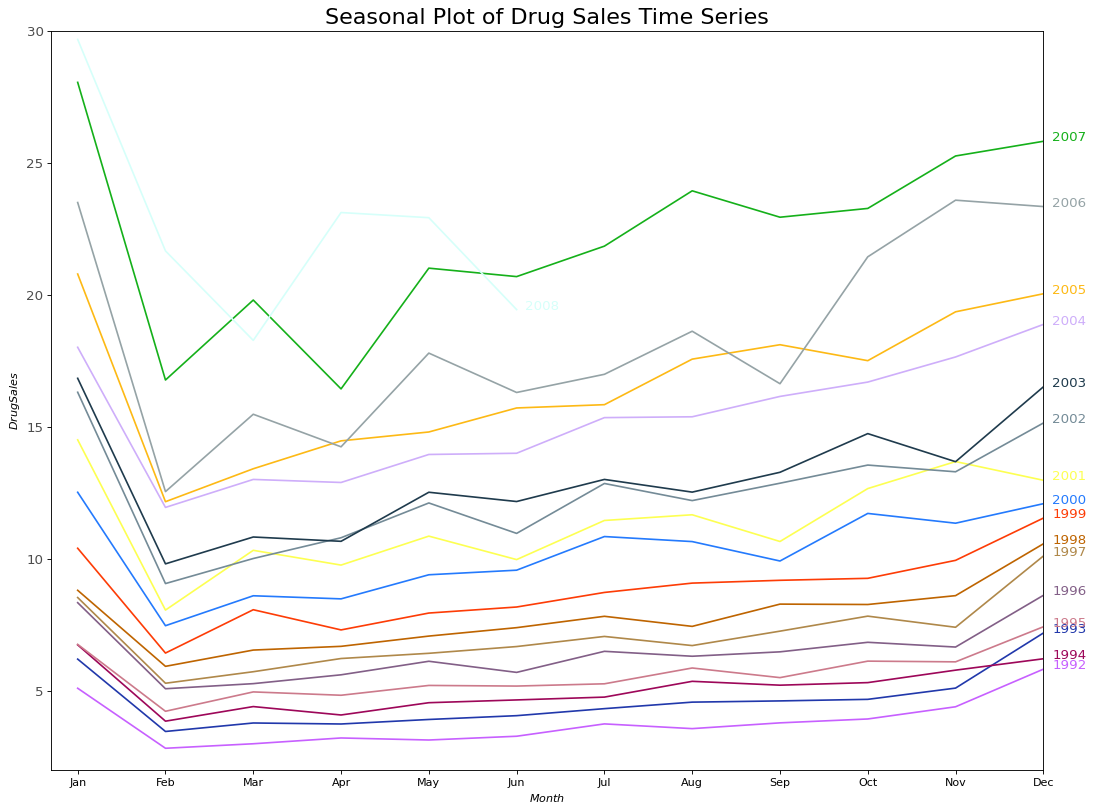

In [116]:
# Import Data
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

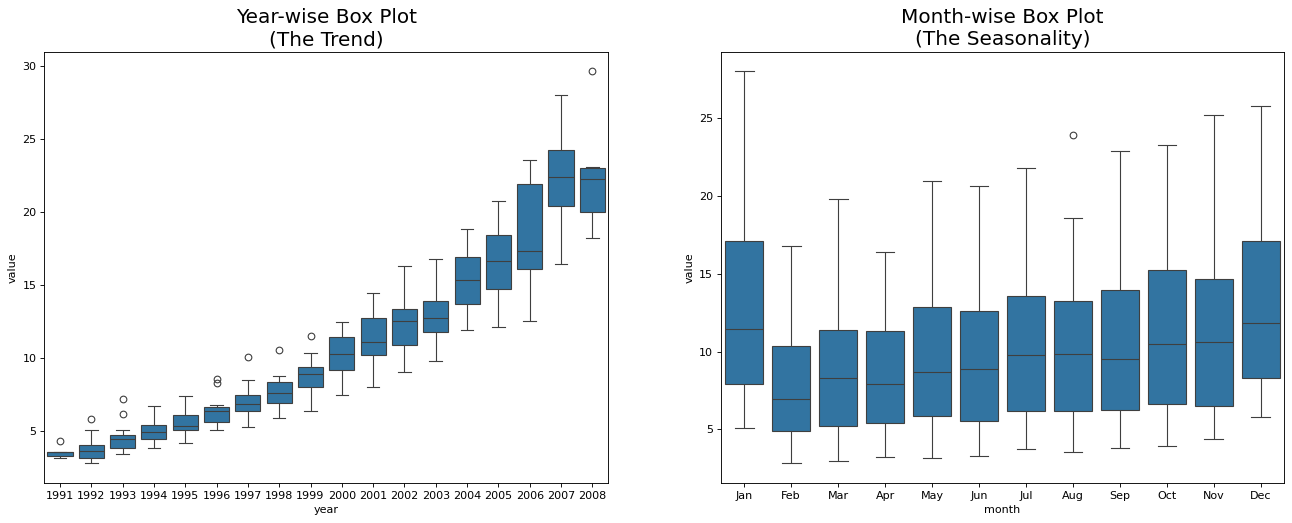

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()